# **TASK - 2**

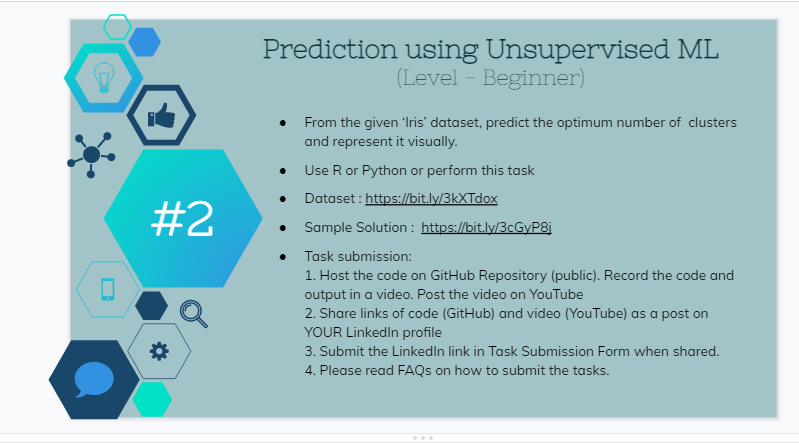

**AUTHOR - SHIVAM SHARMA**

 DATA SCIENCE AND BUSINESS ANALYST INTERN @ THE SPARKS FOUNDATION 

# BATCH - SEPTEMBER 2021

**PREDICTION USING CLUSTERING ALGORITHMS**

FIRST STEP TO IMPORT LIBRARIES

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [80]:
pd.set_option('display.max_column', 400)
pd.set_option('display.max_rows', 100)

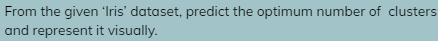

In [81]:
#IMPORTING DATASET
dataset = pd.read_csv("Iris.csv")

In [82]:
print(dataset.shape)

(150, 6)


In [83]:
dataset.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [84]:
species1 = dataset[dataset['Species'] == 'Iris-setosa']
species2 = dataset[dataset['Species'] == 'Iris-versicolor']
species3 = dataset[dataset['Species'] == 'Iris-virginica']

In [85]:
print("No. of Iris-setosa species are {} ".format(species1.shape))

print("No. of Iris-versicolor species are {} ".format(species2.shape))

print("No. of Iris-virginica species are {} ".format(species3.shape))


No. of Iris-setosa species are (50, 6) 
No. of Iris-versicolor species are (50, 6) 
No. of Iris-virginica species are (50, 6) 


Since, few columns we dont need for our work so just remove it in below codes.

In [86]:
dataset.drop(columns = 'Id' , inplace=True)


In [87]:
dataset.drop(columns = 'Species', inplace=True)

In [88]:
dataset.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


To find the optimum number of clusters ?

We Gonna Use K-Means CLustering Algorithm Here

In [100]:
X = dataset.iloc[:, [0, 1, 2, 3]].values

In [101]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

Using the elbow method to find the optimal number of clusters

In [91]:
from sklearn.cluster import KMeans
corpes = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
    kmeans.fit(X)
    corpes.append(kmeans.inertia_)

Graph

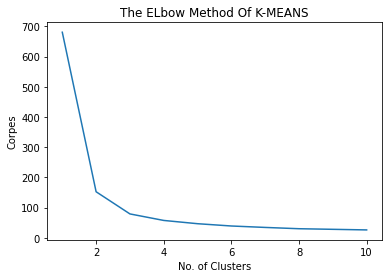

In [92]:

plt.plot(range(1,11), corpes)
plt.title('The ELbow Method Of K-MEANS')
plt.xlabel('No. of Clusters')
plt.ylabel('Corpes')
plt.show()

Training the K-Means model on the dataset

In [93]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 0)
y_kmeans = kmeans.fit_predict(X)

Visualizing the Clusters

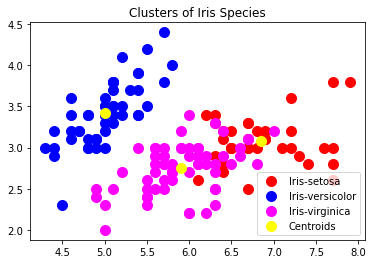

In [98]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Iris-versicolor')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'magenta', label = 'Iris-virginica')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'yellow', label = 'Centroids')
plt.title('Clusters of Iris Species')
plt.legend()
plt.show()

Using the dendrogram to find the optimal number of clusters

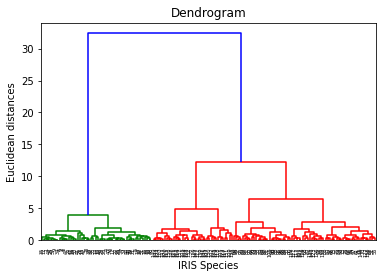

In [102]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('IRIS Species')
plt.ylabel('Euclidean distances')
plt.show()

Training the Hierarchical Clustering model on the dataset

In [103]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

Visualizing the clusters

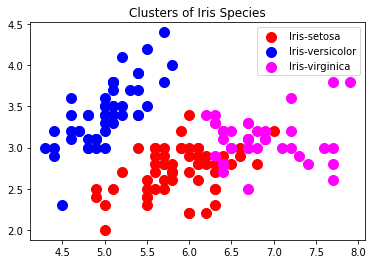

In [104]:
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Iris-versicolor')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'magenta', label = 'Iris-virginica')

plt.title('Clusters of Iris Species')

plt.legend()
plt.show()

# **TASK - 2  IS  COMPLETED  BY  SHIVAM  SHARMA**